<a href="https://colab.research.google.com/github/VICTORIA-OKESIPE/Personal_Projects/blob/main/Nigeria_Loan_Default_Pred/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **KaggleX Final Showcase Project**

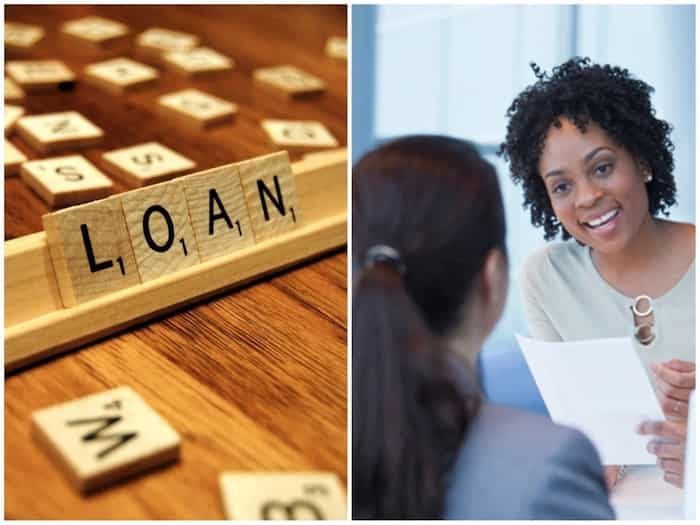

### **PROJECT OUTLINE**
- Business Understanding & Problem Framework


- Exploratory Data Analysis
  * Understanding the Data
  * Relationship Analysis between the variables
  * Cleaning the Data


- Feature Engineering & Modelling
  * Model Training
  * Model Evaluation
  * Shortlisting Promising Models
  * Predictions


- Findings & Recommendations



### **UNDERSTANDING THE PROBLEM**

# **The Problem**

A local digital lending company named SuperLender is dedicated to using credit risk models to offer profitable and impactful loan alternatives. Their assessment approach is based on two key factors that predict loan default: 
(a) the customer's willingness; and 
(b) ability to pay. 



However, since not all customers repay their loans, the company is ready to invest in experienced data scientists to develop robust models for predicting the odds of repayment. 



To make informed decisions about loan approvals, credit grantors need to evaluate these two key factors (the customer's willingness; and the ability to pay) at the point of each application. This is important to determine repayment likelihood and whether an applicant is eligible for a loan, and if so, what the specific terms of the offer will be (like the loan size, price, and tenure).



There are two categories of risk models: (a) new business risk model; and (b) repeat or behavior risk. The former assesses the risk associated with the first loan application, while the latter takes into account the customer's repayment history if they are applying for a repeat loan. Incorporating the customer's prior loan performance can enhance the accuracy of the repeat risk model.



This for me is a great opportunity to use my skills to help solve this challenging problem for SuperLender, a company that values data-driven decision-making.

# **The Objective**

Predict if a loan was good (given) or bad (not given), that is, predict binary outcomes variable, where good is 1 and bad is 0.

# **The Datasets**

There are 3 different datasets: Demographic Data, Performance Data, and Previous Loans Data.

In [87]:
# Importing Necessary Libraries

import pandas as pd     # useful for data manipulation
import numpy as np      # useful for working with arrays
import seaborn as sns   # useful for data visualisation
from sklearn.preprocessing import LabelEncoder  # for data encoding
from xgboost import XGBClassifier # a scikit-learn API compatible class for classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # a cross-validation technique for finding the optimal parameter values from a given set of parameters in a grid
import matplotlib.pyplot as plt  # useful for data visualisation
import plotly.express as px  # useful for high-level data visualisation
# Need to install plotly package 
# !pip install plotly

In [88]:
# Importing Datasets

meta_demo = pd.read_table("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/demographic_metadata.txt", sep=",")#, index_col=0)
meta_perf = pd.read_table("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/performance_metadata.txt", sep=",")
meta_prev_loans = pd.read_table("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/previous_loans_metadata.txt", sep=",")

In [89]:
meta_demo

,DemographicData,Description
0,customerid,Encoded primary key used to merge to other data
1,birthdate,Date of birth of the customer
2,bank_account_type,Type of primary bank account
3,longitude_gps,Longitude gps
4,latitude_gps,Latitude gps
5,bank_name_clients,Name of the bank
6,bank_branch_clients,Location of the branch - not compulsory - so ...
7,employment_status_clients,type of employment that customer has
8,level_of_education_clients,highest level of education


In [90]:
meta_perf

,PerformanceData,Description
0,customerid,Encoded primary key used to merge to other data
1,systemloanid,The id associated with the particular loan. Th...
2,loannumber,The number of the loan that you have to predict
3,approveddate,Date that loan was approved
4,creationdate,Date that loan application was created
5,loanamount,Loan value taken
6,totaldue,Total repayment required to settle the loan -...
7,termdays,Term of loan
8,referredby,customerId of the customer that referred this...


In [91]:
meta_prev_loans

,PreviousLoansData,Description
0,customerid,Encoded primary key used to merge to other data
1,systemloanid,The id associated with the particular loan. Th...
2,loannumber,The number of the loan that you have to predict
3,approveddate,Date that loan was approved
4,creationdate,Date that loan application was created
5,loanamount,Previous loan value taken
6,totaldue,Total repayment required to settle the loan - ...
7,termdays,Term of loan
8,closeddate,Date that the loan was settled
9,referredby,customerId of the customer that referred this ...


# **EXPLORATORY DATA ANALYSIS**

## **Understanding the Data**

In [92]:
# Importing Datasets

demo = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/traindemographics.csv")#, index_col=0)
perf = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/trainperf.csv")#, sep=",")
prev_loans = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/trainprevloans.csv")#, sep=",")

In [93]:
# Copying dataset to another dataframe to avoid making changes to the original datasets
cust_demo = demo.copy()
cust_perf = perf.copy()
cust_prev_loans = prev_loans.copy()

In [94]:
# Feeling the Datasets

cust_demo.head()      # checking the first five rows of the demographic data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [95]:
cust_demo.tail()      # checking the last five rows of the data set

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary
4345,8a85896653e2e18b0153e69c1b90265c,1975-06-05 00:00:00.000000,Savings,6.661014,7.472700,UBA,NaN,Permanent,NaN


In [96]:
cust_perf.head()      # checking the first five rows of the data set 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [97]:
cust_perf.tail()      # checking the last five rows of the data set 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad
4367,8a858fd458639fcc015868eb14b542ad,301967124,8,2017-07-06 21:01:06.000000,2017-07-06 20:01:01.000000,30000.0,34500.0,30,NaN,Bad


In [98]:
cust_prev_loans.head()      # checking the first five rows of the data set 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [99]:
cust_prev_loans.tail()      # checking the last five rows of the data set 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000
18182,8a858faf5679a838015688de3028143d,301715255,2,2016-09-14 23:42:14.000000,2016-09-14 22:42:05.000000,10000.0,13000.0,30,2016-09-29 19:51:04.000000,NaN,2016-10-14 00:00:00.000000,2016-09-29 19:35:55.000000


In [100]:
print("The Customer Demographics Data:", cust_demo.shape)     # getting to know the size of the datasets
print("The Customer Performance Data:", cust_perf.shape)      # getting to know the size of the datasets
print("The Customer Previous Loan Data:", cust_prev_loans.shape)  # getting to know the size of the datasets

The Customer Demographics Data: (4346, 9)
The Customer Performance Data: (4368, 10)
The Customer Previous Loan Data: (18183, 12)


In [101]:
df = pd.merge(cust_demo, cust_perf, on="customerid")

In [102]:
df.shape

(3277, 18)

In [103]:
dfnew = pd.merge(df, cust_prev_loans, on="customerid")

In [104]:
dfnew.shape

(13693, 29)

In [105]:
# copying merged data to avoid manipulating the original dat
merged_data = dfnew.copy()

In [106]:
merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients',
       'systemloanid_x', 'loannumber_x', 'approveddate_x', 'creationdate_x',
       'loanamount_x', 'totaldue_x', 'termdays_x', 'referredby_x',
       'good_bad_flag', 'systemloanid_y', 'loannumber_y', 'approveddate_y',
       'creationdate_y', 'loanamount_y', 'totaldue_y', 'termdays_y',
       'closeddate', 'referredby_y', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [107]:
merged_data.isnull().sum()

customerid                        0
birthdate                         0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
bank_branch_clients           13589
employment_status_clients      1363
level_of_education_clients    10229
systemloanid_x                    0
loannumber_x                      0
approveddate_x                    0
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
referredby_x                  12891
good_bad_flag                     0
systemloanid_y                    0
loannumber_y                      0
approveddate_y                    0
creationdate_y                    0
loanamount_y                      0
totaldue_y                        0
termdays_y                        0
closeddate                        0
referredby_y                  12891
firstduedate                

In [108]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13693 non-null  object 
 1   birthdate                   13693 non-null  object 
 2   bank_account_type           13693 non-null  object 
 3   longitude_gps               13693 non-null  float64
 4   latitude_gps                13693 non-null  float64
 5   bank_name_clients           13693 non-null  object 
 6   bank_branch_clients         104 non-null    object 
 7   employment_status_clients   12330 non-null  object 
 8   level_of_education_clients  3464 non-null   object 
 9   systemloanid_x              13693 non-null  int64  
 10  loannumber_x                13693 non-null  int64  
 11  approveddate_x              13693 non-null  object 
 12  creationdate_x              13693 non-null  object 
 13  loanamount_x                136

In [109]:
cat_cols = merged_data.select_dtypes("object")
cat_cols.columns

for i in cat_cols.columns:
  merged_data[i] = merged_data[i].astype("category")

In [110]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   customerid                  13693 non-null  category
 1   birthdate                   13693 non-null  category
 2   bank_account_type           13693 non-null  category
 3   longitude_gps               13693 non-null  float64 
 4   latitude_gps                13693 non-null  float64 
 5   bank_name_clients           13693 non-null  category
 6   bank_branch_clients         104 non-null    category
 7   employment_status_clients   12330 non-null  category
 8   level_of_education_clients  3464 non-null   category
 9   systemloanid_x              13693 non-null  int64   
 10  loannumber_x                13693 non-null  int64   
 11  approveddate_x              13693 non-null  category
 12  creationdate_x              13693 non-null  category
 13  loanamount_x    

In [111]:
# label_encoder object
label_encoder =LabelEncoder()

# getting categorical variables
catt_cols = merged_data.select_dtypes("category")

# Encode labels in column. 

for i in catt_cols:
  merged_data[i]= label_encoder.fit_transform(merged_data[i])

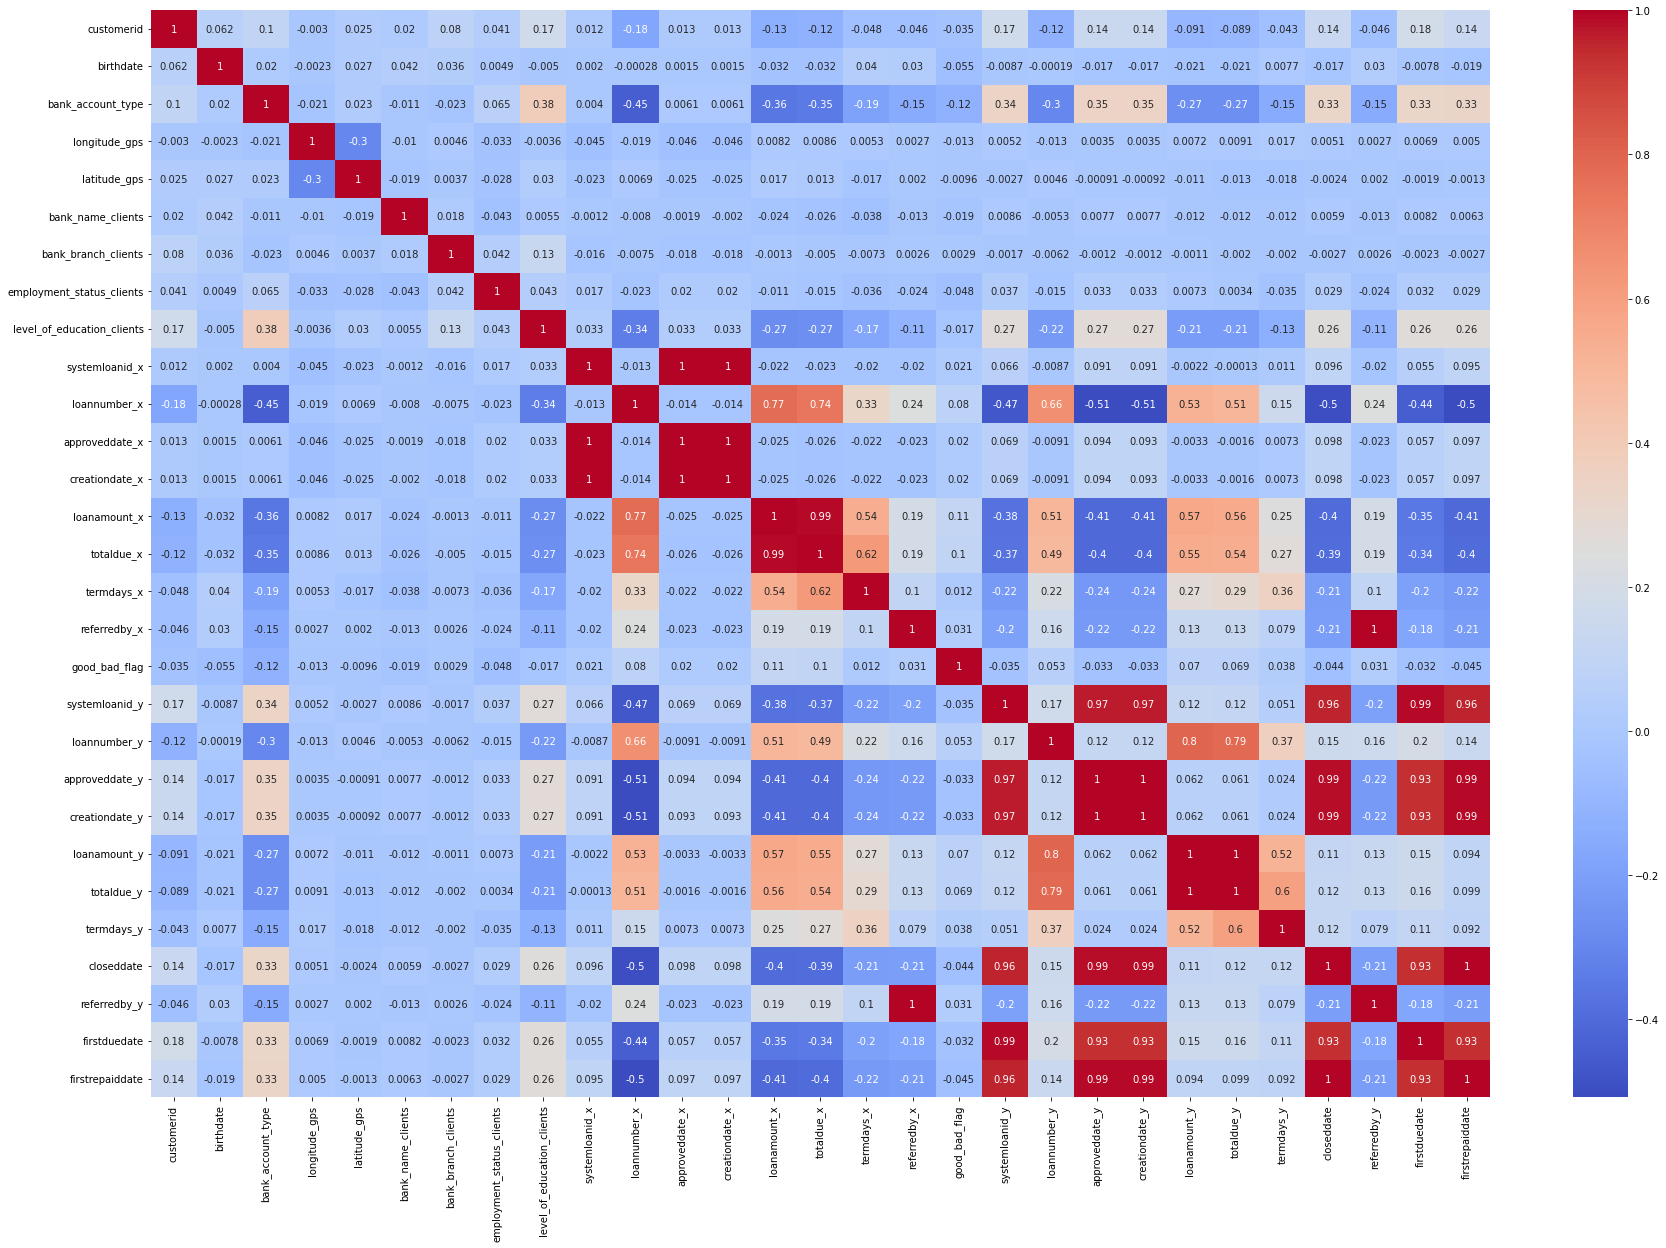

In [112]:
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm');

In [113]:
merged_data.drop(["customerid"], axis=1, inplace=True)

In [115]:
merged_data.isnull().sum() 

birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
bank_branch_clients           0
employment_status_clients     0
level_of_education_clients    0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
referredby_x                  0
good_bad_flag                 0
systemloanid_y                0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
referredby_y                  0
firstduedate                  0
firstrepaiddate               0
dtype: int64

In [116]:
merged_data.head()

,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,loannumber_x,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,169,2,3.319219,6.528604,6,28,6,4,301964962,2,...,1,12308,12309,10000.0,11500.0,15,11365,8,328,11450
1,1465,2,3.325598,7.119403,12,28,1,4,301972172,2,...,1,11225,11225,10000.0,13000.0,30,11892,407,330,11966
2,1668,2,5.746100,5.563174,4,28,6,4,301976271,4,...,3,11316,11316,10000.0,13000.0,30,12021,407,331,12097
3,1668,2,5.746100,5.563174,4,28,6,4,301976271,4,...,1,8830,8832,10000.0,11500.0,15,8467,407,298,8522
4,1668,2,5.746100,5.563174,4,28,6,4,301976271,4,...,2,10296,10297,10000.0,11500.0,15,9344,407,311,9408


In [117]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   birthdate                   13693 non-null  int64  
 1   bank_account_type           13693 non-null  int64  
 2   longitude_gps               13693 non-null  float64
 3   latitude_gps                13693 non-null  float64
 4   bank_name_clients           13693 non-null  int64  
 5   bank_branch_clients         13693 non-null  int64  
 6   employment_status_clients   13693 non-null  int64  
 7   level_of_education_clients  13693 non-null  int64  
 8   systemloanid_x              13693 non-null  int64  
 9   loannumber_x                13693 non-null  int64  
 10  approveddate_x              13693 non-null  int64  
 11  creationdate_x              13693 non-null  int64  
 12  loanamount_x                13693 non-null  float64
 13  totaldue_x                  136

In [120]:
# Change date column to its appriopriate datatype

date_cols = [i for i in merged_data.columns if 'date' in i]
date_cols

['birthdate',
 'approveddate_x',
 'creationdate_x',
 'approveddate_y',
 'creationdate_y',
 'closeddate',
 'firstduedate',
 'firstrepaiddate']

In [121]:
for i in date_cols:
  merged_data[i] = pd.to_datetime(merged_data[i])

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   birthdate                   13693 non-null  datetime64[ns]
 1   bank_account_type           13693 non-null  int64         
 2   longitude_gps               13693 non-null  float64       
 3   latitude_gps                13693 non-null  float64       
 4   bank_name_clients           13693 non-null  int64         
 5   bank_branch_clients         13693 non-null  int64         
 6   employment_status_clients   13693 non-null  int64         
 7   level_of_education_clients  13693 non-null  int64         
 8   systemloanid_x              13693 non-null  int64         
 9   loannumber_x                13693 non-null  int64         
 10  approveddate_x              13693 non-null  datetime64[ns]
 11  creationdate_x              13693 non-null  datetime64

In [123]:
merged_data["bank_account_type"].unique()

array([2, 1, 0])

## Deductions

- The memory usage has now reduced from 1.7+ MB to 426.5 KB

In [124]:
cust_demo["bank_account_type"].unique()

array(['Savings', 'Other', 'Current'], dtype=object)

In [125]:
cust_demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [126]:
merged_data.head()

,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,systemloanid_x,loannumber_x,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,1970-01-01 00:00:00.000000169,2,3.319219,6.528604,6,28,6,4,301964962,2,...,1,1970-01-01 00:00:00.000012308,1970-01-01 00:00:00.000012309,10000.0,11500.0,15,1970-01-01 00:00:00.000011365,8,1970-01-01 00:00:00.000000328,1970-01-01 00:00:00.000011450
1,1970-01-01 00:00:00.000001465,2,3.325598,7.119403,12,28,1,4,301972172,2,...,1,1970-01-01 00:00:00.000011225,1970-01-01 00:00:00.000011225,10000.0,13000.0,30,1970-01-01 00:00:00.000011892,407,1970-01-01 00:00:00.000000330,1970-01-01 00:00:00.000011966
2,1970-01-01 00:00:00.000001668,2,5.746100,5.563174,4,28,6,4,301976271,4,...,3,1970-01-01 00:00:00.000011316,1970-01-01 00:00:00.000011316,10000.0,13000.0,30,1970-01-01 00:00:00.000012021,407,1970-01-01 00:00:00.000000331,1970-01-01 00:00:00.000012097
3,1970-01-01 00:00:00.000001668,2,5.746100,5.563174,4,28,6,4,301976271,4,...,1,1970-01-01 00:00:00.000008830,1970-01-01 00:00:00.000008832,10000.0,11500.0,15,1970-01-01 00:00:00.000008467,407,1970-01-01 00:00:00.000000298,1970-01-01 00:00:00.000008522
4,1970-01-01 00:00:00.000001668,2,5.746100,5.563174,4,28,6,4,301976271,4,...,2,1970-01-01 00:00:00.000010296,1970-01-01 00:00:00.000010297,10000.0,11500.0,15,1970-01-01 00:00:00.000009344,407,1970-01-01 00:00:00.000000311,1970-01-01 00:00:00.000009408


## Deductions

- There are 3 categorical variables in the Demographic Data with missing values.
- There is only 1 categorical variables in the Performance Data with missing values.
- There is only 1 categorical variable in the Previous Loans Data with missing values.
- The data types recognized as "object" can be converted to "categories".

## Summarising the Datasets

In [127]:
merged_data.describe().T      # summarising the numerical variables in the datasets

,count,mean,std,min,25%,50%,75%,max
bank_account_type,13693.0,1.595706e+00,0.513179,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
longitude_gps,13693.0,4.482207e+00,8.639590,-1.182470e+02,3.354793e+00,3.576022e+00,6.364658e+00,1.512093e+02
latitude_gps,13693.0,7.291442e+00,3.436232,-3.386882e+01,6.471885e+00,6.617633e+00,7.421333e+00,7.122807e+01
bank_name_clients,13693.0,6.420945e+00,4.540078,0.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,1.700000e+01
bank_branch_clients,13693.0,2.787446e+01,1.581767,0.000000e+00,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01
employment_status_clients,13693.0,2.036515e+00,1.659737,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,6.000000e+00
level_of_education_clients,13693.0,3.131381e+00,1.583692,0.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
systemloanid_x,13693.0,3.019801e+08,13435.313603,3.019585e+08,3.019678e+08,3.019787e+08,3.019929e+08,3.020040e+08
loannumber_x,13693.0,8.401081e+00,4.318780,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01,2.700000e+01
loanamount_x,13693.0,2.568867e+04,12625.374212,1.000000e+04,1.000000e+04,3.000000e+04,4.000000e+04,6.000000e+04


In [128]:
merged_data.shape

(13693, 28)

In [129]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   birthdate                   13693 non-null  datetime64[ns]
 1   bank_account_type           13693 non-null  int64         
 2   longitude_gps               13693 non-null  float64       
 3   latitude_gps                13693 non-null  float64       
 4   bank_name_clients           13693 non-null  int64         
 5   bank_branch_clients         13693 non-null  int64         
 6   employment_status_clients   13693 non-null  int64         
 7   level_of_education_clients  13693 non-null  int64         
 8   systemloanid_x              13693 non-null  int64         
 9   loannumber_x                13693 non-null  int64         
 10  approveddate_x              13693 non-null  datetime64[ns]
 11  creationdate_x              13693 non-null  datetime64

In [130]:
merged_data.describe(include=["category"]).T

ValueError: ignored

## Deductions

- There are no missing values in the columns "longitude_gps" and "latitude_gps".
- The least new loan applicants can borrow is ₦$10,000$, while in the past minimum loan was ₦$3,000$. Meanwhile, regardless of whether new or returning loan applicant, maximum loan amount is ₦$60,000$.
- The customers have a maximum of 90 days to repay the loan. While the minimum number of days for repayment is 15 days.


In [ ]:
cust_demo.nunique()    # checking the number of unique entries

customerid                    4334
birthdate                     3297
bank_account_type                3
longitude_gps                 4103
latitude_gps                  4313
bank_name_clients               18
bank_branch_clients             45
employment_status_clients        6
level_of_education_clients       4
dtype: int64

In [ ]:
cust_perf.nunique()     # checking the number of unique entries

customerid       4368
systemloanid     4368
loannumber         23
approveddate     4362
creationdate     4364
loanamount         10
totaldue           47
termdays            4
referredby        521
good_bad_flag       2
dtype: int64

In [ ]:
cust_prev_loans.nunique()      # checking the number of unique entries

customerid          4359
systemloanid       18183
loannumber            26
approveddate       18172
creationdate       18173
loanamount            16
totaldue              97
termdays               4
closeddate         17955
referredby           521
firstduedate         363
firstrepaiddate    18011
dtype: int64

In [ ]:
cust_demo["level_of_education_clients"].unique()

[NaN, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary']
Categories (4, object): ['Graduate', 'Post-Graduate', 'Primary', 'Secondary']

In [ ]:
cust_perf["termdays"].unique()

array([30, 15, 60, 90])

In [ ]:
cust_demo.corr()

,longitude_gps,latitude_gps
longitude_gps,1.000000,-0.172954
latitude_gps,-0.172954,1.000000


In [ ]:
cust_perf.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,-0.046542,-0.057324,-0.061628,-0.065113
loannumber,-0.046542,1.000000,0.833318,0.815303,0.405131
loanamount,-0.057324,0.833318,1.000000,0.994392,0.558818
totaldue,-0.061628,0.815303,0.994392,1.000000,0.627599
termdays,-0.065113,0.405131,0.558818,0.627599,1.000000


In [ ]:
cust_prev_loans.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,0.170905,0.119215,0.117780,0.046271
loannumber,0.170905,1.000000,0.798862,0.785038,0.368215
loanamount,0.119215,0.798862,1.000000,0.995142,0.520504
totaldue,0.117780,0.785038,0.995142,1.000000,0.593770
termdays,0.046271,0.368215,0.520504,0.593770,1.000000


## **Relationship Analysis between the Variables**

In [ ]:
cust_demo['birthdate'].head(10)
cust_demo['birthdate'].tail(10)

4336    1990-02-17 00:00:00.000000
4337    1967-06-26 00:00:00.000000
4338    1982-10-19 00:00:00.000000
4339    1986-02-16 00:00:00.000000
4340    1983-06-07 00:00:00.000000
4341    1985-12-13 00:00:00.000000
4342    1982-07-01 00:00:00.000000
4343    1989-09-26 00:00:00.000000
4344    1985-09-06 00:00:00.000000
4345    1975-06-05 00:00:00.000000
Name: birthdate, dtype: category
Categories (3297, object): ['1961-10-13 00:00:00.000000', '1961-11-17 00:00:00.000000',
                            '1962-02-11 00:00:00.000000', '1962-03-07 00:00:00.000000', ...,
                            '1996-02-15 00:00:00.000000', '1996-03-24 00:00:00.000000',
                            '1996-03-25 00:00:00.000000', '1996-03-28 00:00:00.000000']

In [ ]:
cust_demo['birthdate'].count()

4346

In [ ]:
cust_demo['Year'] = cust_demo['birthdate'].apply(lambda x: str(x)[:4])
cust_demo['Year']

0       1973
1       1986
2       1987
3       1991
4       1982
        ... 
4341    1985
4342    1982
4343    1989
4344    1985
4345    1975
Name: Year, Length: 4346, dtype: object

In [ ]:
cust_demo.groupby(['Year'])['Year'].count()

Year
1961      2
1962      9
1963      6
1964      9
1965     14
1966     10
1967     13
1968     20
1969     18
1970     33
1971     23
1972     48
1973     41
1974     71
1975     91
1976     97
1977    110
1978    142
1979    150
1980    203
1981    187
1982    237
1983    262
1984    301
1985    289
1986    324
1987    275
1988    282
1989    250
1990    230
1991    160
1992    176
1993    126
1994     80
1995     53
1996      4
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year'>

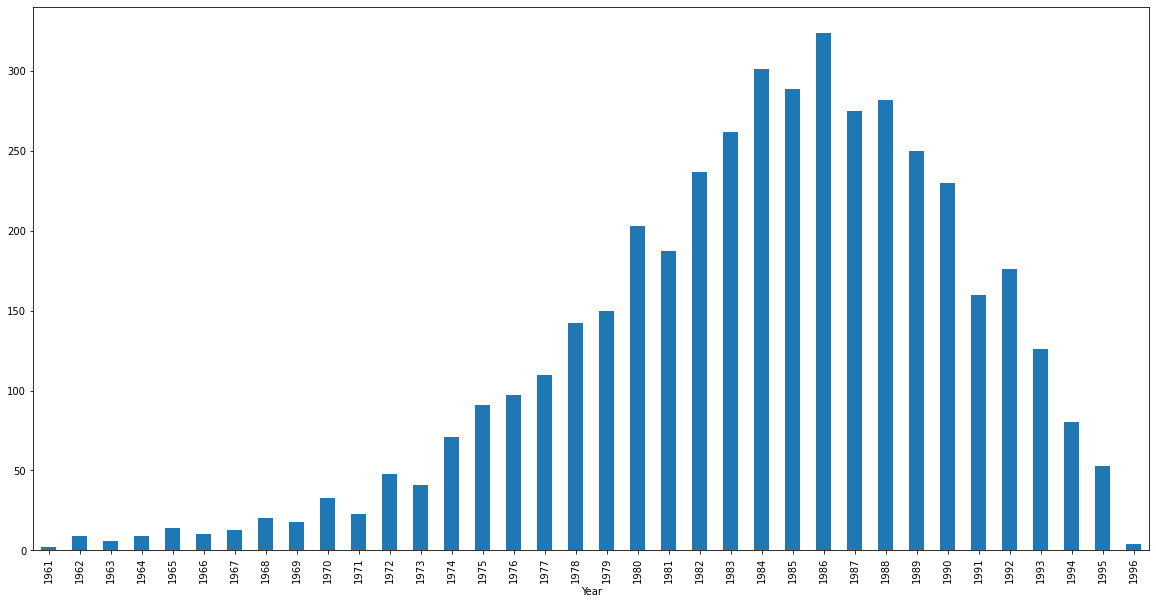

In [ ]:
cust_demo.pivot_table(columns=['Year'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

In [ ]:
cust_demo.groupby(['bank_name_clients'])['bank_name_clients'].count()

bank_name_clients
Access Bank            432
Diamond Bank           282
EcoBank                150
FCMB                   121
Fidelity Bank          103
First Bank             590
GT Bank               1598
Heritage Bank           22
Keystone Bank           19
Skye Bank              102
Stanbic IBTC           145
Standard Chartered      15
Sterling Bank           55
UBA                    353
Union Bank              23
Unity Bank               7
Wema Bank               28
Zenith Bank            301
Name: bank_name_clients, dtype: int64

<AxesSubplot:xlabel='bank_name_clients'>

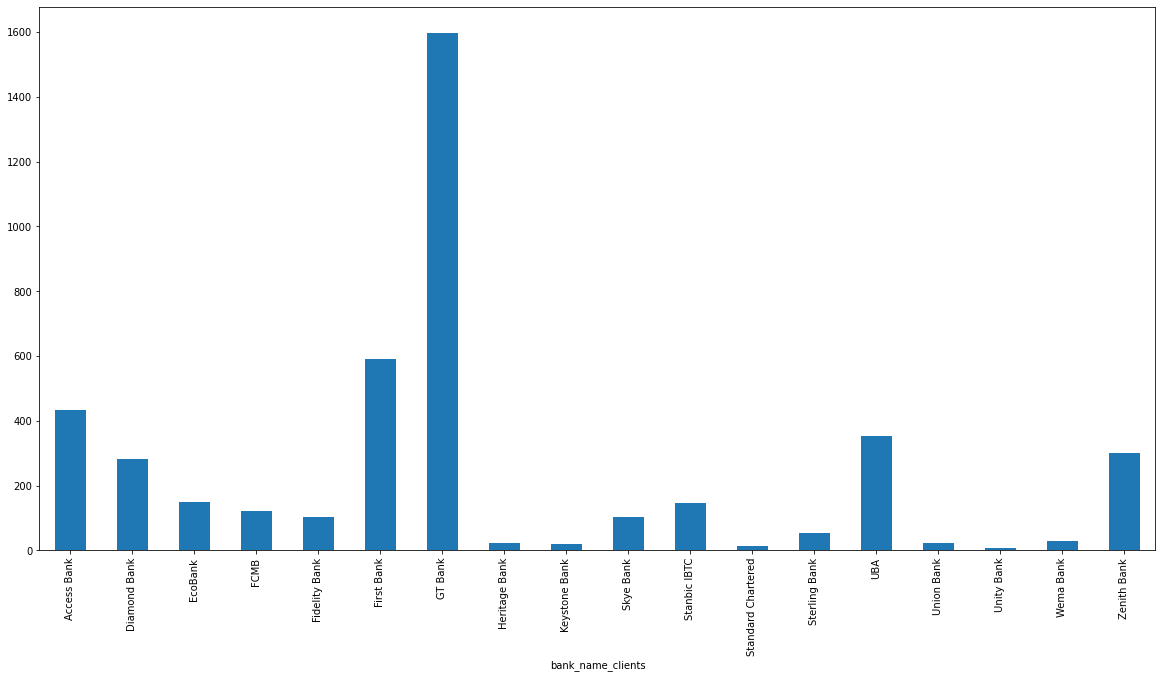

In [ ]:
cust_demo.pivot_table(columns=['bank_name_clients'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

In [ ]:
cust_demo.groupby(['employment_status_clients'])['employment_status_clients'].count()

employment_status_clients
Contract            1
Permanent        3146
Retired             4
Self-Employed     348
Student           142
Unemployed         57
Name: employment_status_clients, dtype: int64

<AxesSubplot:xlabel='employment_status_clients'>

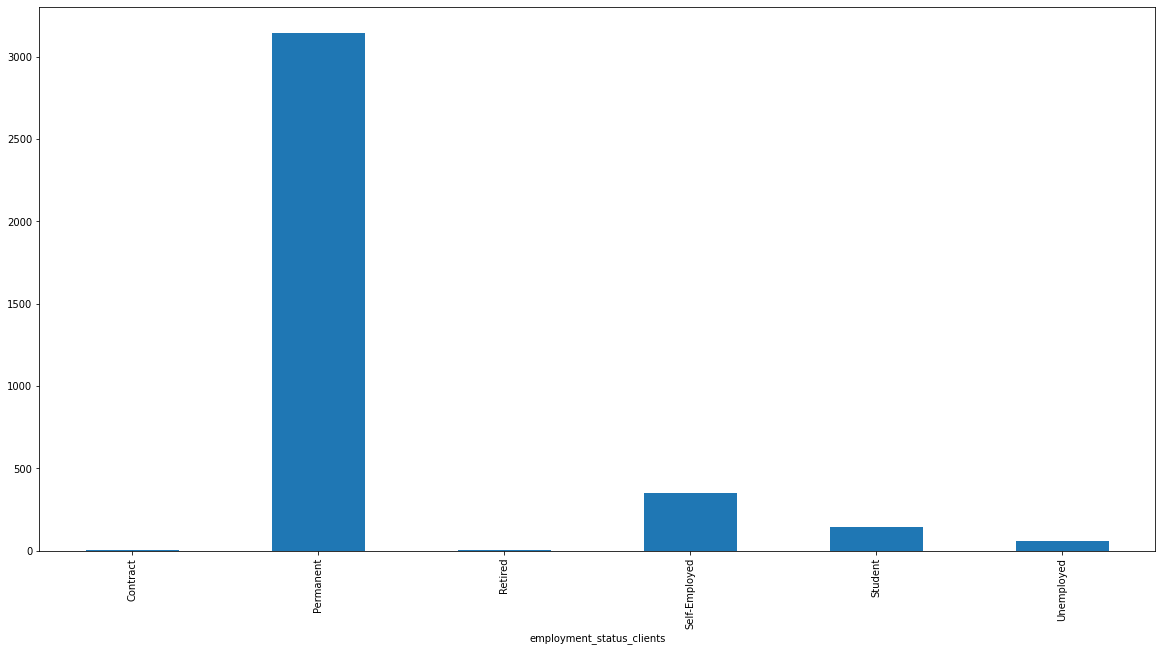

In [ ]:
cust_demo.pivot_table(columns=['employment_status_clients'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

In [ ]:
cust_demo.groupby(['level_of_education_clients'])['level_of_education_clients'].count()

level_of_education_clients
Graduate         420
Post-Graduate     68
Primary           10
Secondary         89
Name: level_of_education_clients, dtype: int64

<AxesSubplot:ylabel='None'>

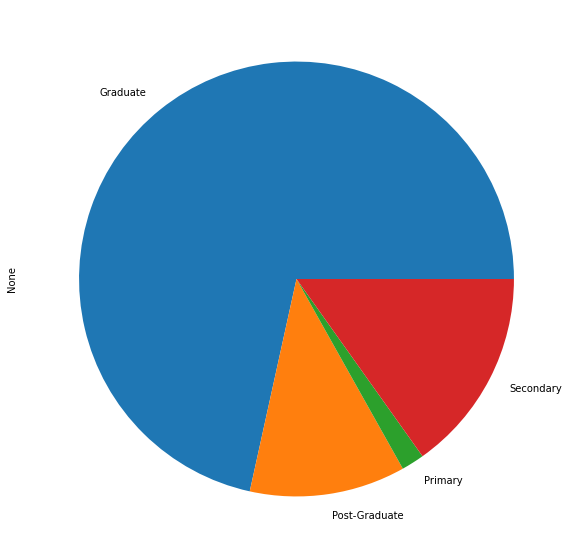

In [ ]:
cust_demo.pivot_table(columns=['level_of_education_clients'],aggfunc='size').plot(kind='pie', figsize = (20, 10))

In [ ]:
fig = px.scatter_geo(cust_demo, lat='latitude_gps', lon='longitude_gps', hover_name="bank_name_clients")
fig.show()

<AxesSubplot:xlabel='latitude_gps', ylabel='longitude_gps'>

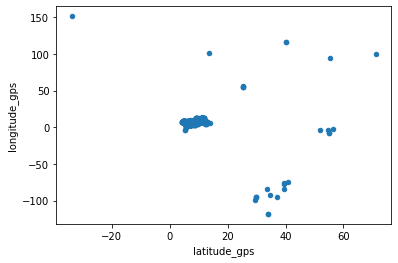

In [ ]:
cust_demo.plot(x="latitude_gps", y="longitude_gps", kind="scatter")

# **PREPROCESSING THE DATA**

## **Cleaning the Data**

In [ ]:
age = []
for i in cust_demo["Year"]:
  age.append(2017-int(i))


cust_demo["age"]=age

In [ ]:
# Merging the Datasets

merged_data=pd.merge(cust_demo, cust_perf, on='customerid',)
merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,Year,age,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1973,44,301964962,2,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1986,31,301972172,2,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30,NaN,Bad
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,30,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,1991,26,301997763,2,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0,11500.0,15,NaN,Good
4,8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,NaN,1990,27,301992494,6,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0,24500.0,30,NaN,Good


In [ ]:
merged_data.shape

(3277, 20)

In [ ]:
final_merged_data=pd.merge(merged_data, cust_prev_loans, on='customerid')
final_merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,Year,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1973,...,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,8a858899538ddb8e0153a780c56e34bb,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1986,...,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,NaN,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,NaN,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,1,2017-05-08 11:07:01.000000,2017-05-08 10:06:40.000000,10000.0,11500.0,15,2017-05-27 13:02:53.000000,NaN,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,2,2017-05-27 17:10:41.000000,2017-05-27 16:10:34.000000,10000.0,11500.0,15,2017-06-08 11:13:50.000000,NaN,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000


In [ ]:
final_merged_data.shape

(13693, 31)

In [ ]:
final_merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients', 'Year',
       'age', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'referredby_x', 'good_bad_flag', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'closeddate', 'referredby_y', 'firstduedate',
       'firstrepaiddate'],
      dtype='object')

In [ ]:
final_merged_data.dtypes

customerid                      object
birthdate                     category
bank_account_type             category
longitude_gps                  float64
latitude_gps                   float64
bank_name_clients             category
bank_branch_clients           category
employment_status_clients     category
level_of_education_clients    category
Year                            object
age                              int64
systemloanid_x                   int64
loannumber_x                     int64
approveddate_x                  object
creationdate_x                  object
loanamount_x                   float64
totaldue_x                     float64
termdays_x                       int64
referredby_x                    object
good_bad_flag                   object
systemloanid_y                   int64
loannumber_y                     int64
approveddate_y                  object
creationdate_y                  object
loanamount_y                   float64
totaldue_y               

### **Handling Missing Data**

In [ ]:
# counting missing data
final_merged_data.isna().sum()

customerid                        0
birthdate                         0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
bank_branch_clients           13589
employment_status_clients      1363
level_of_education_clients    10229
Year                              0
age                               0
systemloanid_x                    0
loannumber_x                      0
approveddate_x                    0
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
referredby_x                  12891
good_bad_flag                     0
systemloanid_y                    0
loannumber_y                      0
approveddate_y                    0
creationdate_y                    0
loanamount_y                      0
totaldue_y                        0
termdays_y                        0
closeddate                  

In [ ]:
final_merged_data.drop(['bank_branch_clients','referredby_x','referredby_y'], axis=1, inplace=True)

In [ ]:
final_merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Year', 'age', 'systemloanid_x',
       'loannumber_x', 'approveddate_x', 'creationdate_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'good_bad_flag', 'systemloanid_y',
       'loannumber_y', 'approveddate_y', 'creationdate_y', 'loanamount_y',
       'totaldue_y', 'termdays_y', 'closeddate', 'firstduedate',
       'firstrepaiddate'],
      dtype='object')

In [ ]:
final_merged_data['employment_status_clients'].fillna(final_merged_data['employment_status_clients'].mode()[0], inplace=True)
final_merged_data['level_of_education_clients'].fillna('Graduate', inplace=True)
final_merged_data.isna().sum() 

customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Year                          0
age                           0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
good_bad_flag                 0
systemloanid_y                0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
dtype: int64

In [ ]:
final_merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Year,age,...,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,Permanent,Graduate,1973,44,...,301943951,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,Graduate,1986,31,...,301929966,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,Permanent,Graduate,1987,30,...,301931228,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,Permanent,Graduate,1987,30,...,301895253,1,2017-05-08 11:07:01.000000,2017-05-08 10:06:40.000000,10000.0,11500.0,15,2017-05-27 13:02:53.000000,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,Permanent,Graduate,1987,30,...,301919784,2,2017-05-27 17:10:41.000000,2017-05-27 16:10:34.000000,10000.0,11500.0,15,2017-06-08 11:13:50.000000,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000


In [ ]:
final_merged_data.tail()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Year,age,...,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate
13688,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301633289,1,2016-06-16 08:36:03.000000,2016-06-16 07:35:56.000000,10000.0,11500.0,15,2016-07-05 23:59:54.000000,2016-07-01 00:00:00.000000,2016-07-05 23:44:51.000000
13689,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301918076,5,2017-05-25 13:39:27.000000,2017-05-25 12:39:21.000000,10000.0,13000.0,30,2017-06-19 17:03:34.000000,2017-06-26 00:00:00.000000,2017-06-19 16:53:24.000000
13690,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301824314,3,2017-02-22 17:16:36.000000,2017-02-22 16:16:28.000000,10000.0,13000.0,30,2017-03-23 19:19:20.000000,2017-03-24 00:00:00.000000,2017-03-23 19:04:10.000000
13691,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,32,...,301874438,4,2017-04-20 12:21:24.000000,2017-04-20 11:21:09.000000,10000.0,13000.0,30,2017-05-21 10:07:50.000000,2017-05-22 00:00:00.000000,2017-05-21 09:52:41.000000
13692,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,Permanent,Graduate,1982,35,...,301960158,1,2017-07-02 17:50:14.000000,2017-07-02 16:49:05.000000,10000.0,11500.0,15,2017-07-16 06:31:38.000000,2017-07-18 00:00:00.000000,2017-07-16 06:21:28.000000


In [ ]:
final_merged_data.dtypes

customerid                      object
birthdate                     category
bank_account_type             category
longitude_gps                  float64
latitude_gps                   float64
bank_name_clients             category
employment_status_clients     category
level_of_education_clients    category
Year                            object
age                              int64
systemloanid_x                   int64
loannumber_x                     int64
approveddate_x                  object
creationdate_x                  object
loanamount_x                   float64
totaldue_x                     float64
termdays_x                       int64
good_bad_flag                   object
systemloanid_y                   int64
loannumber_y                     int64
approveddate_y                  object
creationdate_y                  object
loanamount_y                   float64
totaldue_y                     float64
termdays_y                       int64
closeddate               

In [ ]:
final_merged_data['Year'].unique()

array(['1973', '1986', '1987', '1991', '1990', '1992', '1994', '1970',
       '1988', '1989', '1983', '1984', '1985', '1982', '1977', '1979',
       '1976', '1981', '1995', '1974', '1993', '1966', '1978', '1975',
       '1980', '1967', '1972', '1969', '1971', '1968', '1964', '1965',
       '1963', '1962', '1996', '1961'], dtype=object)

In [ ]:
train_df=final_merged_data.drop(columns=['customerid','birthdate','systemloanid_x','systemloanid_y','approveddate_x','approveddate_y','creationdate_x','creationdate_y','closeddate','firstduedate','firstrepaiddate'])

### **Encoding Categorical Data**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   bank_account_type           13693 non-null  category
 1   longitude_gps               13693 non-null  float64 
 2   latitude_gps                13693 non-null  float64 
 3   bank_name_clients           13693 non-null  category
 4   employment_status_clients   13693 non-null  category
 5   level_of_education_clients  13693 non-null  category
 6   Year                        13693 non-null  object  
 7   age                         13693 non-null  int64   
 8   loannumber_x                13693 non-null  int64   
 9   loanamount_x                13693 non-null  float64 
 10  totaldue_x                  13693 non-null  float64 
 11  termdays_x                  13693 non-null  int64   
 12  good_bad_flag               13693 non-null  object  
 13  loannumber_y    

In [ ]:
cat_cols = train_df.select_dtypes("object")
cat_cols.columns

Index(['Year', 'good_bad_flag'], dtype='object')

In [ ]:
for i in cat_cols.columns:
  train_df[i] = train_df[i].astype("category")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   bank_account_type           13693 non-null  category
 1   longitude_gps               13693 non-null  float64 
 2   latitude_gps                13693 non-null  float64 
 3   bank_name_clients           13693 non-null  category
 4   employment_status_clients   13693 non-null  category
 5   level_of_education_clients  13693 non-null  category
 6   Year                        13693 non-null  category
 7   age                         13693 non-null  int64   
 8   loannumber_x                13693 non-null  int64   
 9   loanamount_x                13693 non-null  float64 
 10  totaldue_x                  13693 non-null  float64 
 11  termdays_x                  13693 non-null  int64   
 12  good_bad_flag               13693 non-null  category
 13  loannumber_y    

In [ ]:
Cat_cols = train_df.select_dtypes("category");
Cat_cols.columns

cat_cols = []

for i in Cat_cols.columns:
  cat_cols.append(i)

cat_cols

['bank_account_type',
 'bank_name_clients',
 'employment_status_clients',
 'level_of_education_clients',
 'Year',
 'good_bad_flag']

In [ ]:
Num_cols = train_df.select_dtypes(["int64", "float64"]);
Num_cols.columns

num_cols = []

for i in Num_cols.columns:
  num_cols.append(i)

num_cols

['longitude_gps',
 'latitude_gps',
 'age',
 'loannumber_x',
 'loanamount_x',
 'totaldue_x',
 'termdays_x',
 'loannumber_y',
 'loanamount_y',
 'totaldue_y',
 'termdays_y']

In [ ]:
# categorical_cols=['bank_account_type', 'bank_name_clients','employment_status_clients','level_of_education_clients','Year','good_bad_flag']
# numerical_cols=['longitude_gps','latitude_gps','loanamount_x','loanamount_y','termdays_y','loanamount_y','totaldue_y','termdays_x','loanamount_x','totaldue_x','loannumber_x','loannumber_y']

In [ ]:
# importing the Encoder

from sklearn.preprocessing import LabelEncoder

In [ ]:
# instantiate the label_encoder
lbl_encoder = LabelEncoder()

for i in cat_cols:
  train_df[i] = lbl_encoder.fit_transform(train_df[i])

In [ ]:
train_df.columns

Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Year', 'age', 'loannumber_x',
       'loanamount_x', 'totaldue_x', 'termdays_x', 'good_bad_flag',
       'loannumber_y', 'loanamount_y', 'totaldue_y', 'termdays_y'],
      dtype='object')

In [ ]:
train_df.head()

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Year,age,loannumber_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,loannumber_y,loanamount_y,totaldue_y,termdays_y
0,2,3.319219,6.528604,6,1,0,12,44,2,10000.0,13000.0,30,1,1,10000.0,11500.0,15
1,2,3.325598,7.119403,12,1,0,25,31,2,10000.0,13000.0,30,0,1,10000.0,13000.0,30
2,2,5.746100,5.563174,4,1,0,26,30,4,10000.0,13000.0,30,1,3,10000.0,13000.0,30
3,2,5.746100,5.563174,4,1,0,26,30,4,10000.0,13000.0,30,1,1,10000.0,11500.0,15
4,2,5.746100,5.563174,4,1,0,26,30,4,10000.0,13000.0,30,1,2,10000.0,11500.0,15


In [ ]:
train_df.columns

Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Year', 'age', 'loannumber_x',
       'loanamount_x', 'totaldue_x', 'termdays_x', 'good_bad_flag',
       'loannumber_y', 'loanamount_y', 'totaldue_y', 'termdays_y'],
      dtype='object')

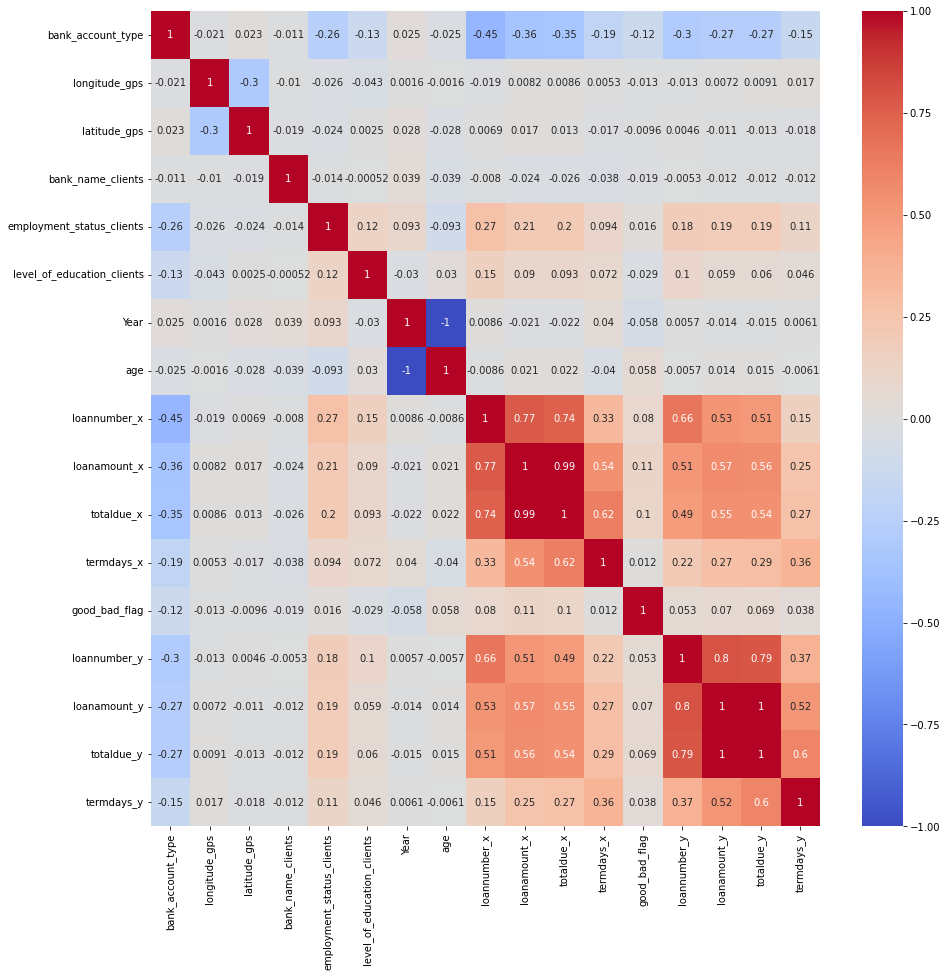

In [ ]:
import seaborn as sns
import matplotlib.pyplot as mp

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm');

In [ ]:
train_df.corr()

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Year,age,loannumber_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,loannumber_y,loanamount_y,totaldue_y,termdays_y
bank_account_type,1.000000,-0.020633,0.022526,-0.011274,-0.256527,-0.127737,0.025150,-0.025150,-0.448816,-0.359226,-0.348307,-0.191079,-0.117763,-0.296195,-0.268675,-0.266813,-0.153422
longitude_gps,-0.020633,1.000000,-0.300672,-0.010468,-0.025933,-0.042970,0.001638,-0.001638,-0.018992,0.008233,0.008558,0.005345,-0.013174,-0.012506,0.007249,0.009109,0.016654
latitude_gps,0.022526,-0.300672,1.000000,-0.018576,-0.024188,0.002544,0.028131,-0.028131,0.006872,0.016843,0.012612,-0.017252,-0.009620,0.004575,-0.011296,-0.013351,-0.017500
bank_name_clients,-0.011274,-0.010468,-0.018576,1.000000,-0.013794,-0.000521,0.039070,-0.039070,-0.008023,-0.024463,-0.025613,-0.037575,-0.019232,-0.005344,-0.011565,-0.011997,-0.011917
employment_status_clients,-0.256527,-0.025933,-0.024188,-0.013794,1.000000,0.118445,0.092675,-0.092675,0.271990,0.208069,0.197913,0.094347,0.016187,0.179634,0.186266,0.186303,0.114942
level_of_education_clients,-0.127737,-0.042970,0.002544,-0.000521,0.118445,1.000000,-0.030234,0.030234,0.150836,0.090393,0.092906,0.071504,-0.028635,0.099834,0.059412,0.060467,0.046452
Year,0.025150,0.001638,0.028131,0.039070,0.092675,-0.030234,1.000000,-1.000000,0.008568,-0.020871,-0.022062,0.040011,-0.057762,0.005655,-0.014268,-0.014889,0.006078
age,-0.025150,-0.001638,-0.028131,-0.039070,-0.092675,0.030234,-1.000000,1.000000,-0.008568,0.020871,0.022062,-0.040011,0.057762,-0.005655,0.014268,0.014889,-0.006078
loannumber_x,-0.448816,-0.018992,0.006872,-0.008023,0.271990,0.150836,0.008568,-0.008568,1.000000,0.773284,0.744855,0.325505,0.080411,0.659946,0.526889,0.506839,0.151975
loanamount_x,-0.359226,0.008233,0.016843,-0.024463,0.208069,0.090393,-0.020871,0.020871,0.773284,1.000000,0.992614,0.544543,0.113026,0.510295,0.566468,0.556789,0.250101


In [ ]:
# copying the data
train_df1 = train_df.copy()

In [ ]:
train_df1.columns

Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Year', 'age', 'loannumber_x',
       'loanamount_x', 'totaldue_x', 'termdays_x', 'good_bad_flag',
       'loannumber_y', 'loanamount_y', 'totaldue_y', 'termdays_y'],
      dtype='object')

### **Machine Learning**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [ ]:
train_df1.columns

Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Year', 'age', 'loannumber_x',
       'loanamount_x', 'totaldue_x', 'termdays_x', 'good_bad_flag',
       'loannumber_y', 'loanamount_y', 'totaldue_y', 'termdays_y'],
      dtype='object')

In [ ]:
# Split Features and Target Varible 
X = train_df1.drop(['good_bad_flag'], axis=1)
y = train_df1['good_bad_flag']

# Splitting into Train-Test Data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [ ]:
X.columns

Index(['bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Year', 'age', 'loannumber_x',
       'loanamount_x', 'totaldue_x', 'termdays_x', 'loannumber_y',
       'loanamount_y', 'totaldue_y', 'termdays_y'],
      dtype='object')

In [ ]:
X.head()

,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Year,age,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y
0,2,3.319219,6.528604,6,1,0,12,44,2,10000.0,13000.0,30,1,10000.0,11500.0,15
1,2,3.325598,7.119403,12,1,0,25,31,2,10000.0,13000.0,30,1,10000.0,13000.0,30
2,2,5.746100,5.563174,4,1,0,26,30,4,10000.0,13000.0,30,3,10000.0,13000.0,30
3,2,5.746100,5.563174,4,1,0,26,30,4,10000.0,13000.0,30,1,10000.0,11500.0,15
4,2,5.746100,5.563174,4,1,0,26,30,4,10000.0,13000.0,30,2,10000.0,11500.0,15


# Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='accuracy').mean())

print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.8152610441767069
Training Data F1 Score  0.8982300884955753
Validation Mean F1 Score:  0.44916020888826613
Validation Mean Accuracy:  0.815409906445838
Test Accuracy:  0.8152610441767069
Test F1 Score:  0.8982300884955753
Confusion Matrix on Test Data


Predicted,1,All
Actual,,
0,506,506
1,2233,2233
All,2739,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.82      1.00      0.90      2233

    accuracy                           0.82      2739
   macro avg       0.41      0.50      0.45      2739
weighted avg       0.66      0.82      0.73      2739



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.9594742606790799
Training Data F1 Score  0.9751288371050862
Validation Mean F1 Score:  0.9130047305754747
Validation Mean Accuracy:  0.9479638787984885
Test Accuracy:  0.9594742606790799
Test F1 Score:  0.9751288371050862
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,452,54,506
1,57,2176,2233
All,509,2230,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       506
           1       0.98      0.97      0.98      2233

    accuracy                           0.96      2739
   macro avg       0.93      0.93      0.93      2739
weighted avg       0.96      0.96      0.96      2739



# Random Forests

In [ ]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))


print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())


print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.9623950346841913
Training Data F1 Score  0.9773177714159876
Validation Mean F1 Score:  0.9139629936392654
Validation Mean Accuracy:  0.9493330332264203
Test Accuracy:  0.9623950346841913
Test F1 Score:  0.9773177714159876
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,417,89,506
1,14,2219,2233
All,431,2308,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       506
           1       0.96      0.99      0.98      2233

    accuracy                           0.96      2739
   macro avg       0.96      0.91      0.93      2739
weighted avg       0.96      0.96      0.96      2739



# Artificial Neural Networks

In [ ]:
Ann_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)
Ann_clf.fit(X_train, y_train)
y_pred = Ann_clf.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.6871120847024461
Training Data F1 Score  0.8056248582444998
Validation Mean F1 Score:  0.9125681890854824
Validation Mean Accuracy:  0.9463205433602389
Test Accuracy:  0.6871120847024461
Test F1 Score:  0.8056248582444998
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,106,400,506
1,457,1776,2233
All,563,2176,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.21      0.20       506
           1       0.82      0.80      0.81      2233

    accuracy                           0.69      2739
   macro avg       0.50      0.50      0.50      2739
weighted avg       0.70      0.69      0.69      2739



# Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Training Data Set Accuracy: ", accuracy_score(y_test,y_pred))
print("Training Data F1 Score ", f1_score(y_test,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Training Data Set Accuracy:  0.69258853596203
Training Data F1 Score  0.8029026217228464
Validation Mean F1 Score:  0.9143689561461423
Validation Mean Accuracy:  0.9482376013121341
Test Accuracy:  0.69258853596203
Test F1 Score:  0.8029026217228464
Confusion Matrix on Test Data


Predicted,0,1,All
Actual,,,
0,182,324,506
1,518,1715,2233
All,700,2039,2739


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.36      0.30       506
           1       0.84      0.77      0.80      2233

    accuracy                           0.69      2739
   macro avg       0.55      0.56      0.55      2739
weighted avg       0.73      0.69      0.71      2739



### **Saving the promising model**

### Trying out XGBoost Classifier.



In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Print model accuracy
print("Accuracy: ", round(xgb_model.score(X_test, y_test), 4))


Accuracy:  0.9617


In [ ]:
xgb_model.save_model("loan_model.json")